**Bitcoin ETFs:** \\
Grayscale Bitcoin Trust	              GBTC	    \$22.7B \\
iShares Bitcoin Trust Registered	    IBIT	    \$6.6B \\
Fidelity Wise Origin Bitcoin Fund	    FBTC	    \$4.7B \\
ARK 21Shares Bitcoin ETF	            ARKB	    \$1.6B \\
Bitwise Bitcoin ETF Trust	            BITB	    \$1.2B



In [2]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

drive.mount('/content/drive')
sid_path = '/content/drive/My Drive/ece473/ece473 final project/code/raw_data'
Our_path = '/content/drive/My Drive/raw_data'

path = sid_path


Mounted at /content/drive


# MINUTE DATA


In [15]:
## CODE TO MAKE ORIGINAL CLEANED DATA SET
# excel_file_path = os.path.join(path, 'Sid IntraDayData.xlsx')

# # Load the Excel file with all sheets
# xl = pd.ExcelFile(excel_file_path)

# # Initialize a dictionary to hold DataFrames, one for each sheet
# dataframes = {}

# # Loop through each sheet in the Excel file
# for sheet_name in xl.sheet_names:
#     # Read each sheet
#     df = pd.read_excel(excel_file_path, sheet_name=sheet_name)
#     # Rename the price column to match the sheet name
#     df.rename(columns={'Open': f'{sheet_name}'}, inplace=True)
#     # Store the DataFrame in the dictionary
#     dataframes[sheet_name] = df

# print(f"Successfully Loaded {len(dataframes)} DataFrames from the Excel file:")

# # Start with the first DataFrame as a base
# merged_df = dataframes[xl.sheet_names[0]]

# # Iterate over the remaining DataFrames and merge them one by one
# for sheet_name in xl.sheet_names[1:]:
#     merged_df = pd.merge(merged_df, dataframes[sheet_name], on='Date', how='outer')

# # Replace NaN values with 0
# merged_df = merged_df.dropna()

# # Save the merged DataFrame to a new Excel file
# merged_df.to_excel(os.path.join(path, 'CleanedIntraDay.xlsx'), index=False)


Successfully Loaded 5 DataFrames from the Excel file:


In [17]:
# Load the Excel file with all sheets
excel_file_path = os.path.join(path, 'Sid IntraDayData.xlsx')
xl = pd.ExcelFile(excel_file_path)

first_sheet_name = xl.sheet_names[0]
df = xl.parse(first_sheet_name)

# Display the first few rows of the DataFrame
print(df.head())

                 Date  BITB1min  IBIT1min  ARKB1min  FBTC1min   BTC1min
0 2024-05-03 15:59:00    33.840    35.360    62.050    54.280  62014.50
1 2024-05-03 15:58:00    33.850    35.385    62.060    54.310  62033.30
2 2024-05-03 15:57:00    33.800    35.325    61.970    54.215  61943.00
3 2024-05-03 15:56:00    33.790    35.315    61.955    54.210  61928.75
4 2024-05-03 15:55:00    33.795    35.315    61.949    54.190  61936.72


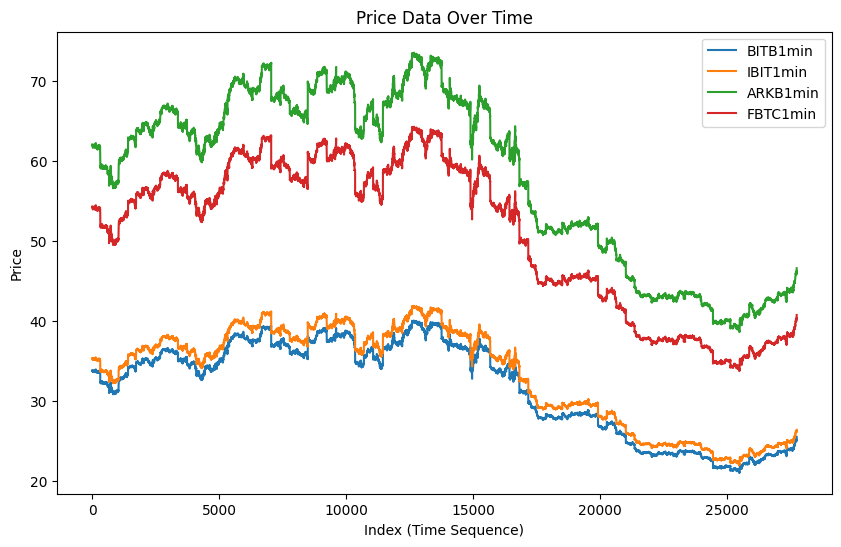

In [21]:

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))

# Plot each price column using the DataFrame index as the x-axis
for column in df.columns[1:5]:  # This skips the first column ('Date')
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Index (Time Sequence)')
plt.ylabel('Price')
plt.title('Price Data Over Time')
plt.legend()
plt.show()

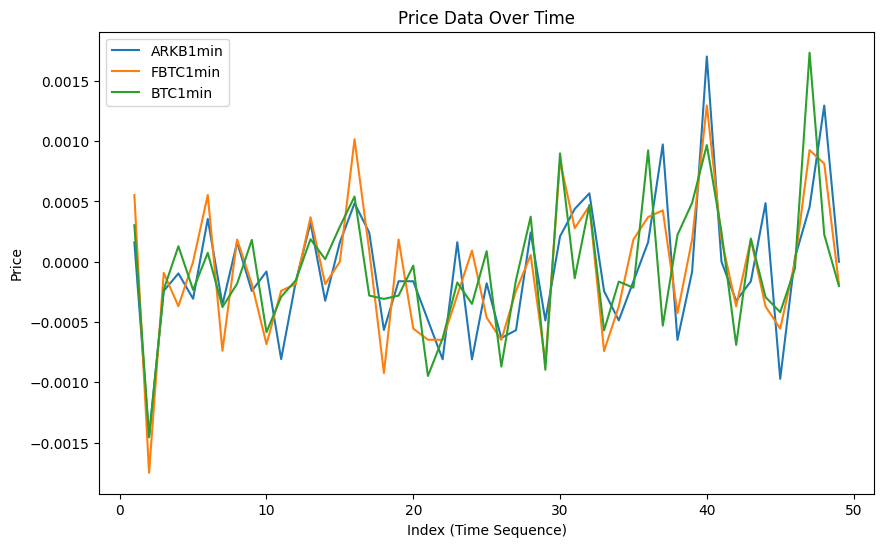

In [29]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))

# Plot each price column using the DataFrame index as the x-axis
for column in df.columns[3:]:  # This skips the first column ('Date')
    plt.plot(df.index[:50], df[column].pct_change()[:50], label=column)

plt.xlabel('Index (Time Sequence)')
plt.ylabel('Price')
plt.title('Price Data Over Time')
plt.legend()
plt.show()

# MACHINE LEARNING

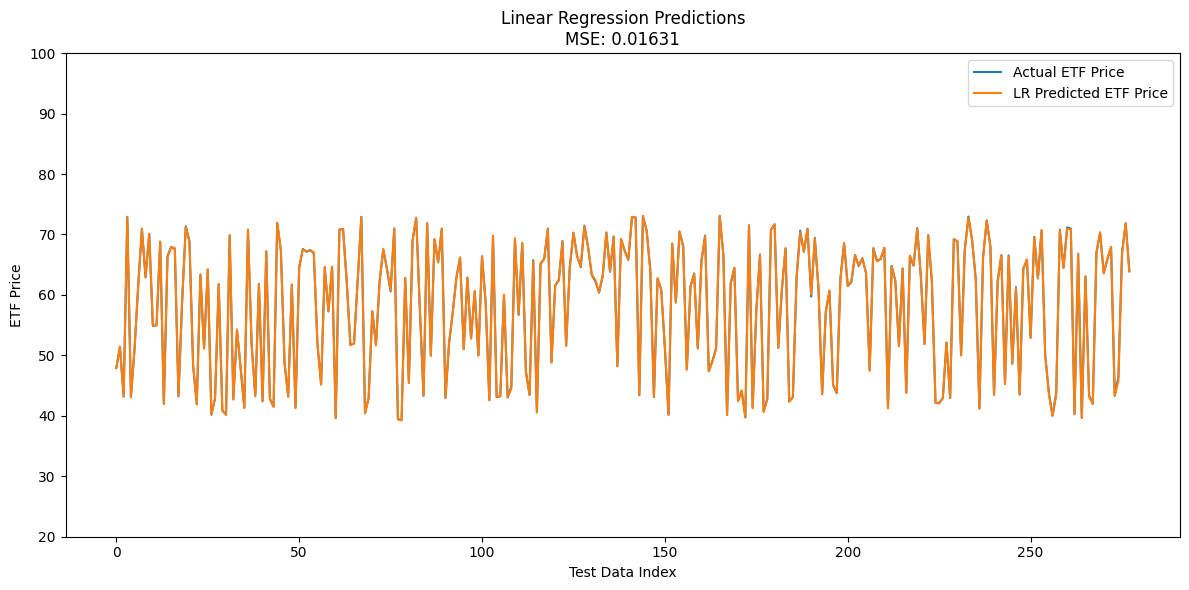

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

def train_linear_regression(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def shift_series(data, t):
    return data.shift(t)

def evaluate_model(X, y, model):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return mse, y_pred

results = []

t = 1 # shift factor for LR
data = df.copy()
data['BTC_Price_t'] = shift_series(data['BTC1min'], t)
data.dropna(inplace=True)  # Drop rows with NaN values caused by shifting

X = data['BTC_Price_t'].values.reshape(-1, 1)
y = data['ARKB1min'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = train_linear_regression(X_train, y_train)
mse_lr, lr_pred = evaluate_model(X_test, y_test, lr_model)


# Plotting the results
plt.figure(figsize=(12, 6))

# Linear Regression Predictions vs Actual
# plt.subplot(1, 2, 1)
interval = 20
plt.plot(y_test[::interval], label='Actual ETF Price')
plt.plot(lr_pred[::interval], label='LR Predicted ETF Price')
plt.title(f'Linear Regression Predictions\nMSE: {mse_lr:.5f}')
plt.xlabel('Test Data Index')
plt.ylabel('ETF Price')
plt.legend()
plt.ylim([20, 100])


plt.tight_layout()
plt.show()


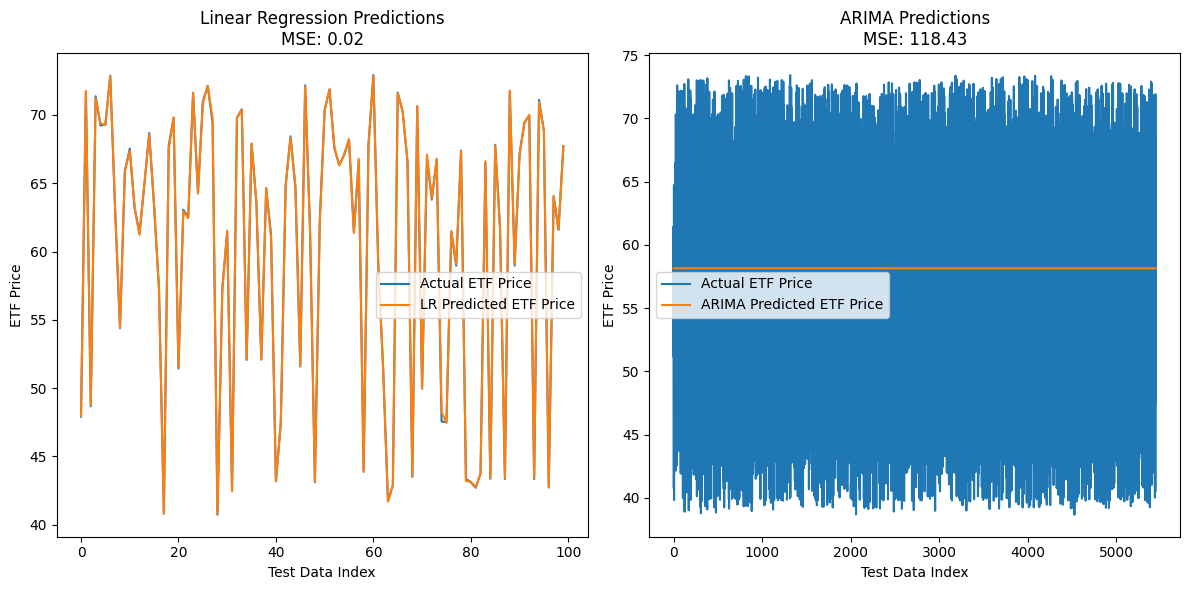

In [41]:

# Plotting the results
plt.figure(figsize=(12, 6))

# Linear Regression Predictions vs Actual
plt.subplot(1, 2, 1)
plt.plot(y_test[:100], label='Actual ETF Price')
plt.plot(lr_pred[:100], label='LR Predicted ETF Price')
plt.title(f'Linear Regression Predictions\nMSE: {mse_lr:.2f}')
plt.xlabel('Test Data Index')
plt.ylabel('ETF Price')
plt.legend()

# ARIMA Predictions vs Actual
plt.subplot(1, 2, 2)
plt.plot(y_test[100:], label='Actual ETF Price')
plt.plot(arima_pred[100:], label='ARIMA Predicted ETF Price')
plt.title(f'ARIMA Predictions\nMSE: {mean_squared_error(y_test, arima_pred):.2f}')
plt.xlabel('Test Data Index')
plt.ylabel('ETF Price')
plt.legend()

plt.tight_layout()
plt.show()

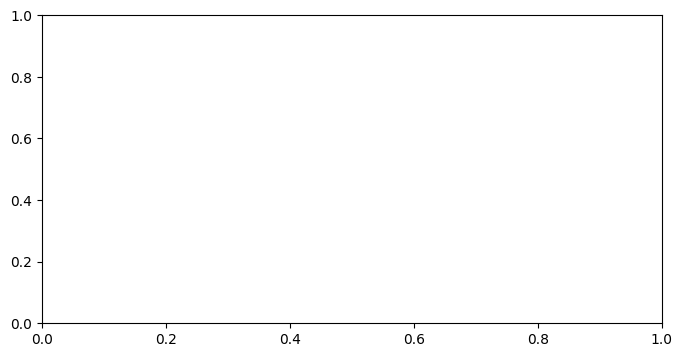

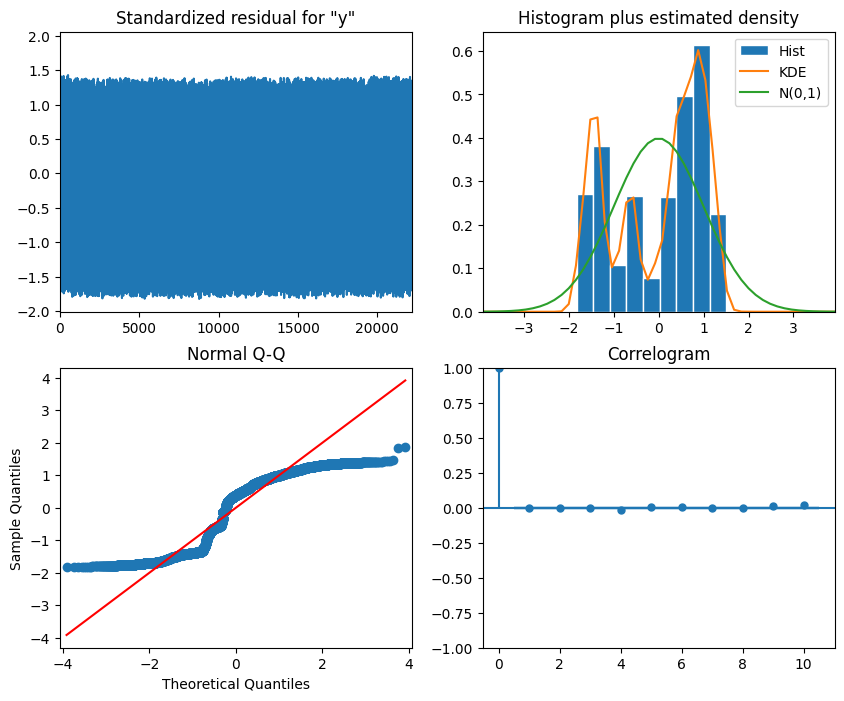

In [40]:

# Diagnostic plot for ARIMA residuals
plt.figure(figsize=(8, 4))
arima_model_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                22189
Model:                 ARIMA(1, 1, 1)   Log Likelihood               14634.356
Date:                Tue, 07 May 2024   AIC                         -29262.711
Time:                        16:35:48   BIC                         -29238.689
Sample:                             0   HQIC                        -29254.891
                              - 22189                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0352      0.704      0.050      0.960      -1.345       1.416
ma.L1         -0.0442      0.704     -0.063      0.950      -1.424       1.336
sigma2         0.0157   1.02e-05   1530.213      0.0

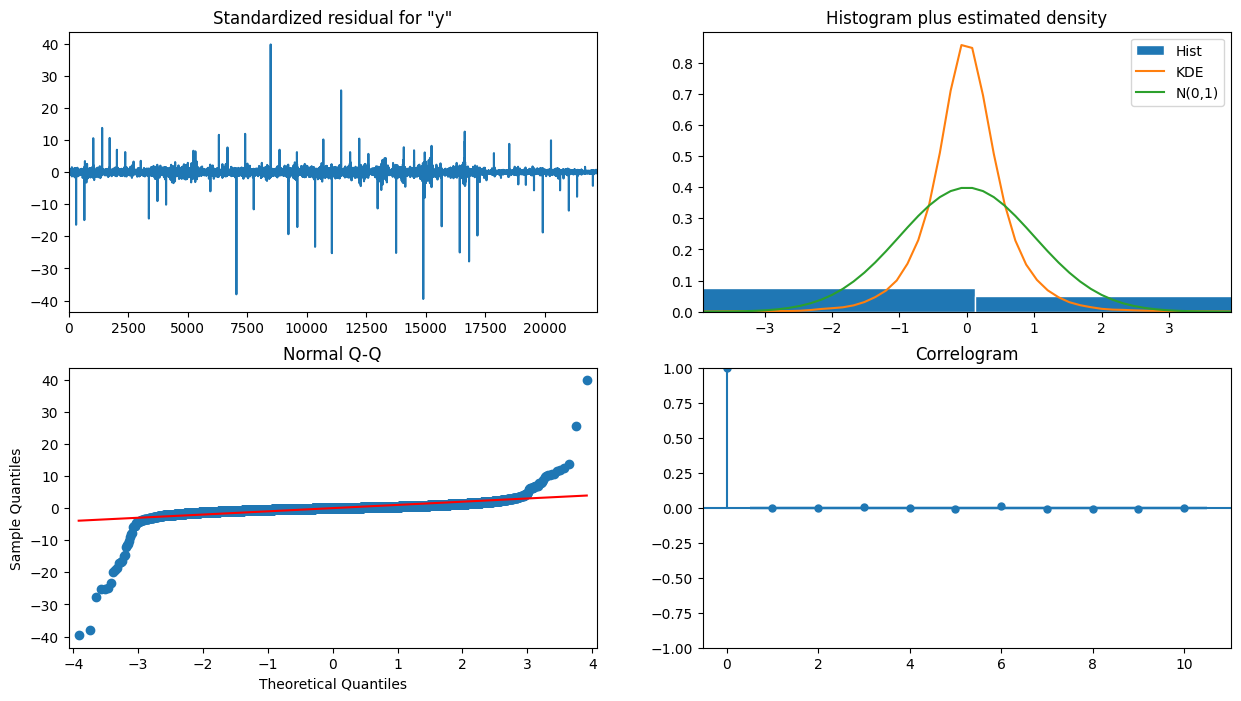

Mean Squared Error: 2.64091634541371


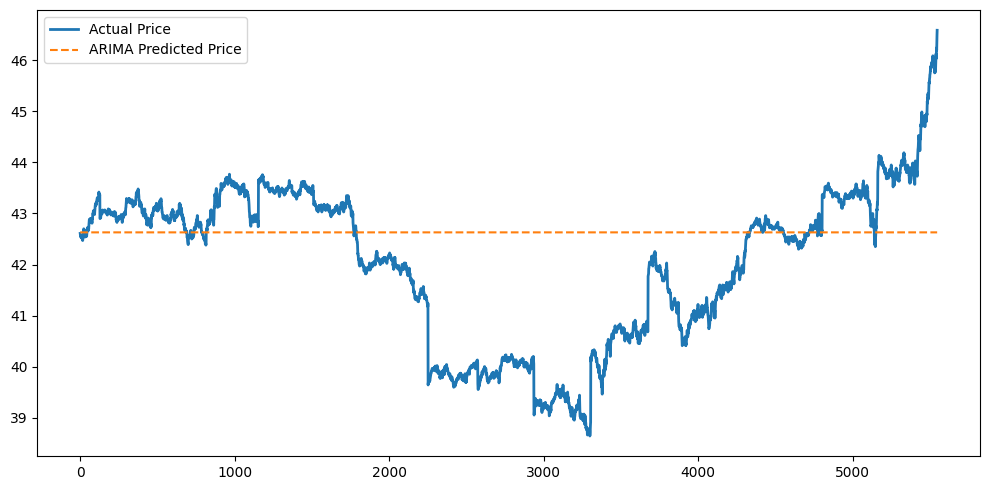

In [46]:

## ARIMA SUCKS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming 'y' is your series of stock prices
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

# Function to train ARIMA model
def train_arima(train_series, order=(1,1,1), steps=1):
    # Ensure the series is treated as a pandas Series
    if not isinstance(train_series, pd.Series):
        train_series = pd.Series(train_series)

    # Fit the ARIMA model
    model = ARIMA(train_series, order=order)
    model_fit = model.fit()

    # Print model summary to check for any issues
    print(model_fit.summary())

    # Diagnostic plots
    model_fit.plot_diagnostics(figsize=(15, 8))
    plt.show()

    # Forecasting future values
    prediction = model_fit.forecast(steps=steps)
    return prediction

# Using the function to forecast
arima_pred = train_arima(train, order=(1,1,1), steps=len(test))

# Calculate Mean Squared Error
mse_arima = mean_squared_error(test, arima_pred)
print("Mean Squared Error:", mse_arima)


# Plotting the actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(range(len(test)), test, label='Actual Price', linewidth=2)
plt.plot(range(len(test)), arima_pred, label='ARIMA Predicted Price', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()

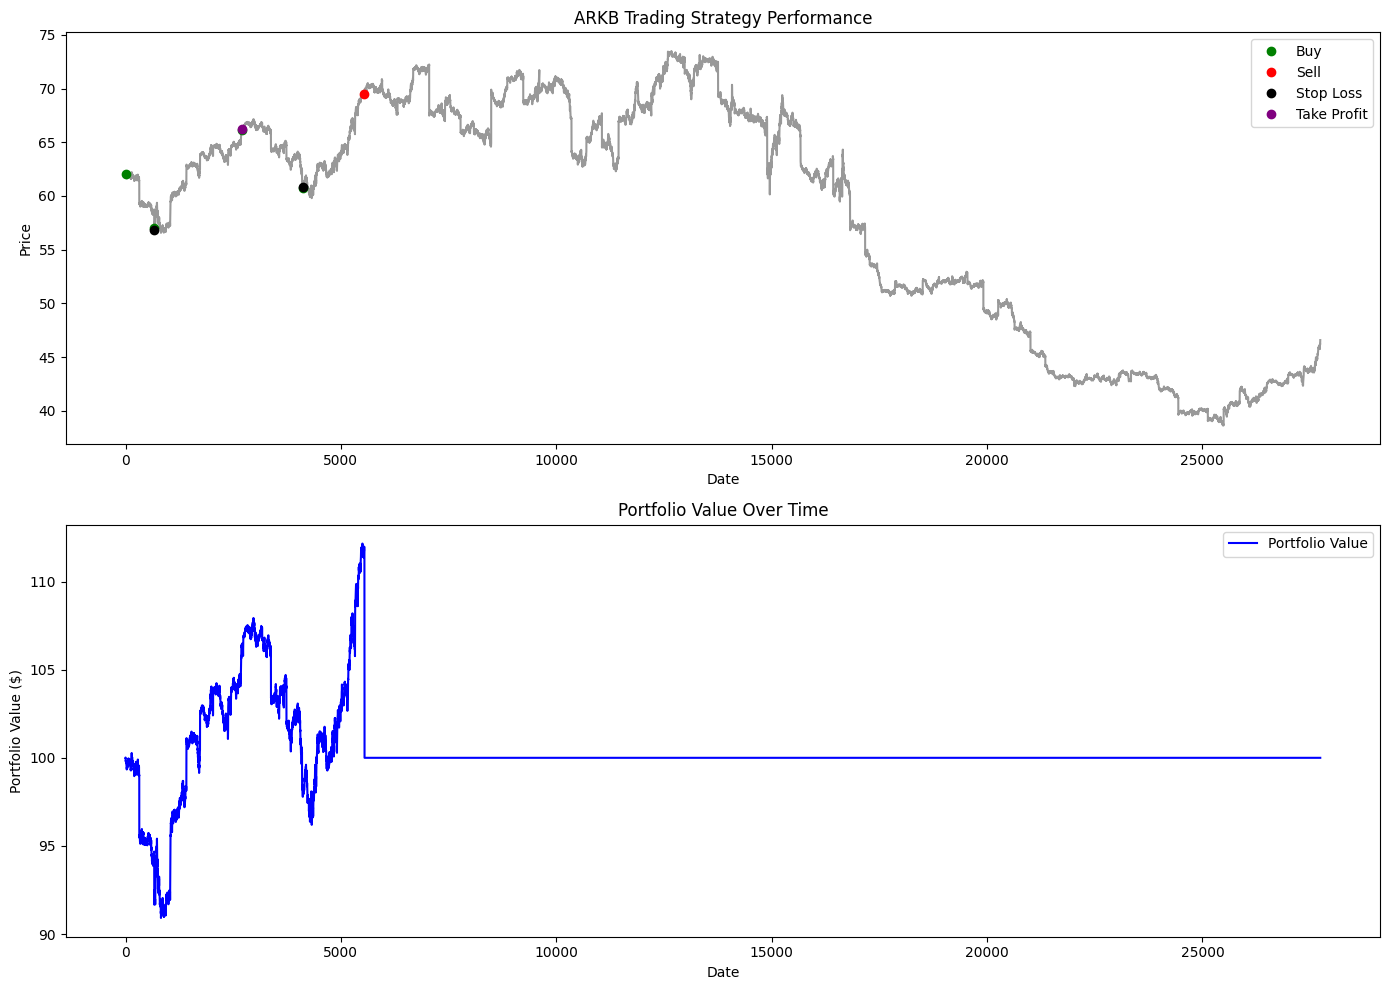

Final Portfolio Value: $100.00


In [57]:
## TRADING STRATEGY DOESN'T REALLY WORK

ARKB = df["ARKB1min"]
def simulate_trading_strategy(series, predictions):
    initial_capital = 100
    capital = initial_capital
    shares = 0
    buy_price = None
    stop_loss = None
    take_profit = None
    trade_actions = {'buy': [], 'sell': [], 'stop_loss': [], 'take_profit': []}
    portfolio_values = [initial_capital] * (len(series) - 1)  # Initialize with the initial capital for each day

    for i in range(len(predictions) - 1):
        current_price = series.iloc[i]
        predicted_next_price = predictions[i+1]
        current_volatility = (series.max() - series.min()) / series.mean()  # Simple volatility measure

        # Adjust stop loss and take profit dynamically
        dynamic_stop_loss_multiplier = 0.90 + 0.05 * (1 - current_volatility)
        dynamic_take_profit_multiplier = 1.10 + 0.10 * current_volatility

        # Manage open position
        if buy_price is not None:
            if current_price <= stop_loss:
                capital += shares * current_price
                trade_actions['stop_loss'].append((series.index[i], current_price))
                shares = 0
                buy_price = None
            elif current_price >= take_profit:
                capital += shares * current_price
                trade_actions['take_profit'].append((series.index[i], current_price))
                shares = 0
                buy_price = None
            elif i == len(predictions) - 2:  # Close position at the last data point
                capital += shares * current_price
                trade_actions['sell'].append((series.index[i], current_price))
                shares = 0
                buy_price = None
        else:
            if (predicted_next_price - current_price) / current_price > 0.005:
                shares = capital / current_price
                buy_price = current_price
                stop_loss = buy_price * dynamic_stop_loss_multiplier
                take_profit = buy_price * dynamic_take_profit_multiplier
                capital = 0
                trade_actions['buy'].append((series.index[i], current_price))

        # Update portfolio value for each day
        portfolio_values[i] = capital + (shares * current_price) if shares > 0 else capital

    returns = (capital + (shares * series.iloc[-1]) - initial_capital) / initial_capital if shares > 0 else (capital - initial_capital) / initial_capital
    return trade_actions, returns, portfolio_values


# Re-run the simulation with the adjusted function
trade_actions, total_returns, portfolio_values = simulate_trading_strategy(ARKB, predictions)

# Now plot using the new portfolio_values
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.plot(ARKB.index, ARKB, label='ARKB Price', color='gray', alpha=0.8)

# Define markers for legend management
legend_handles = []  # This will store the handles for the legend
markers = {'Buy': ('green', 'o'), 'Sell': ('red', 'o'), 'Stop Loss': ('black', 'o'), 'Take Profit': ('purple', 'o')}

# Plotting with single entry in the legend for each type of trade action
for action, details in markers.items():
    dates = [date for date, price in trade_actions[action.lower().replace(' ', '_')]]
    prices = [price for date, price in trade_actions[action.lower().replace(' ', '_')]]
    if dates:  # Check if there are any points to plot
        line, = plt.plot(dates, prices, marker=details[1], linestyle='', color=details[0], label=action)
        legend_handles.append(line)  # Add the handle to the list for the legend

plt.title('ARKB Trading Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(handles=legend_handles)  # Use the handles list for the legend

# Second plot for portfolio value
plt.subplot(2, 1, 2)
plt.plot(ARKB.index[:-1], portfolio_values, label='Portfolio Value', color='blue')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

print(f"Final Portfolio Value: ${portfolio_values[-1]:.2f}")

